In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',160)
sns.set(rc={'figure.figsize': (20,3)})
%matplotlib inline
reviews=pd.read_csv('reviews.csv.gz', usecols=['date', 'comments'])
reviews['date']=pd.to_datetime(reviews.date)
reviews['year']=reviews.date.dt.year
reviews['month']=reviews['date'].dt.month
reviews.head(3)

,date,comments,year,month
0,2009-12-05,"Colleen was friendly and very helpful regarding directions, maps and suggestions for places to go.\r\nHer flat is centrally located and it's easy to walk ab...",2009,12
1,2010-03-31,"Great place, centrally located, easy walk to train station, bus station across the street. Walking distance to great bars, clubs, and restaurants. Very go...",2010,3
2,2010-05-14,Colleen is very friendly and helpful. The apartment is nice and located conveniently.,2010,5


In [ ]:
reviews['comments']=reviews.comments.str.replace('!','')
reviews['comments']=reviews.comments.str.replace(',','')
reviews['comments']=reviews.comments.str.replace('.','')
reviews['comments']=reviews.comments.str.replace('+','')
reviews['comments']=reviews.comments.str.replace('%','')
reviews['comments']=reviews.comments.str.replace('!','')
reviews['comments']=reviews.comments.str.replace(':','')
reviews['comments']=reviews.comments.str.replace('\'','')
reviews['comments']=reviews.comments.str.replace('\\','')
reviews['comments']=reviews.comments.str.replace('/','')
reviews['comments']=reviews.comments.str.replace('-','')
reviews['comments']=reviews.comments.str.replace('(','')
reviews['comments']=reviews.comments.str.replace(')','')

In [51]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548607 entries, 0 to 548606
Data columns (total 4 columns):
date        548607 non-null datetime64[ns]
comments    548322 non-null object
year        548607 non-null int64
month       548607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 16.7+ MB


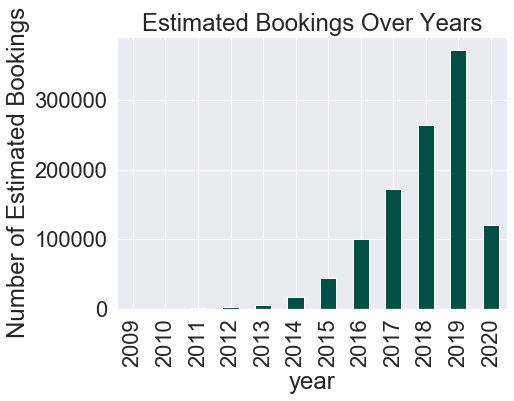

In [55]:
sns.set(rc={'figure.figsize': (7,5)})
sns.set(font_scale=2)
reviews_count=reviews.groupby('year')['date'].count()
bookings=reviews_count * 2
# reviews_year = pd.DataFrame(reviews_data.groupby(['year']).review_date.count().reset_index())
# bookings.plot(kind='bar', color='#B0BF1A')
plt.title('Estimated Bookings Over Years')
plt.ylabel('Number of Estimated Bookings')
bookings.plot(kind='bar', color='#015045')
plt.savefig('Estimated Bookings Over Years')


Airbnb’s claim that 50% of guests review their stay.Therefore multiplying the number of reviews by 2 gives the estimated number of bookings.
https://towardsdatascience.com/airbnb-rental-listings-dataset-mining-f972ed08ddec 

In [4]:
reviews.columns

Index(['date', 'comments', 'year'], dtype='object')

In [6]:
reviews.columns
reviews.comments.head(1000)
reviews_sample=reviews.sample(frac=0.1)
reviews_sample.shape
reviews_sample.to_csv('reviews_sample.csv')


In [45]:
# reviews.groupby(['year','month'])['comments'].count().tail(54).reset_index()

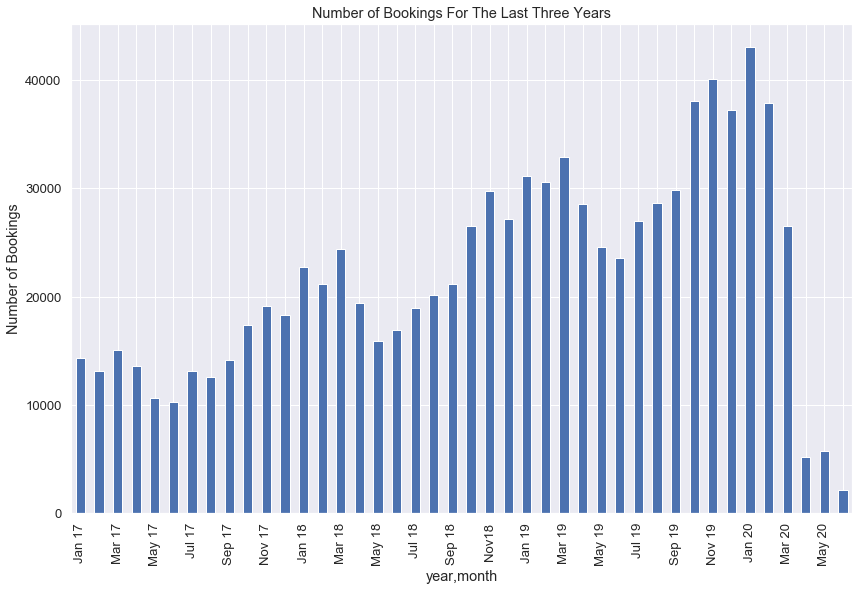

In [79]:
sns.set(rc={'figure.figsize': (14,9)})
sns.set(font_scale=1.2)
bookings1=reviews.groupby(['year','month'])['comments'].count()*2
g=bookings1.tail(42).plot(kind='bar')
# xlabels=list(range(1,43,2))
xlabels=['Jan 17','','Mar 17','', 'May 17','','Jul 17','','Sep 17','','Nov 17','','Jan 18','','Mar 18','', 'May 18','','Jul 18','','Sep 18','','Nov18','',
         'Jan 19','','Mar 19','', 'May 19','','Jul 19','','Sep 19','','Nov 19','','Jan 20','','Mar 20','', 'May 20','','Jul','','Sep','','Nov']

g.set_xticklabels(xlabels)
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings For The Last Three Years')
# reviews.groupby(['year','month'])['comments'].count().tail(42).plot(kind='bar')
plt.savefig('Number of bookings for the last three years')



This graph shows that November, December, January, February, and March are the busiest months with the most numbers of bookings. 

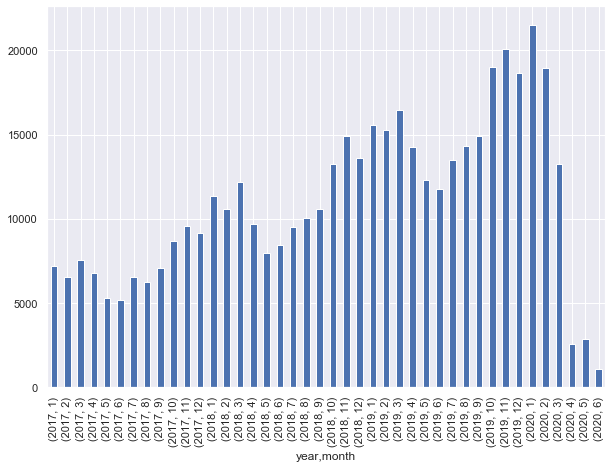

In [68]:
reviews.groupby(['year','month'])['comments'].count().tail(42).plot(kind='bar')
